### regularización R-SCHA-2D
ver Thebault 2006 y 2008

In [2]:
import numpy, scipy
import trig
import fibonacci_sphere
import xyzfield
from matplotlib import pyplot
import matplotlib
from mpl_toolkits import basemap
%matplotlib nbagg

##### parámetros

In [3]:
lon_c = 20; lat_c = 45; colat_0 = 24.8
theta_c, phi_c, theta_0 = numpy.deg2rad((90-lat_c, lon_c, colat_0))

In [4]:
m_max = 1; k_max = 2

raíces

In [8]:
import scha
ms = numpy.arange(0, k_max+1)
k, m, n = scha.join_roots(scha.degree(ms, theta_0, 10))
k = numpy.array(k); m = numpy.array(m); n = numpy.array(n)
print("{0:>5} {1:>5} {2:>10}".format("k", "m", "n"))
print("-"*27)
for kk, mm, nn in zip(k, m, n):
    print("{0:>5} {1:>5} {2:10.4f}".format(kk,mm,nn))

    k     m          n
---------------------------
    0     0     0.0000
    1     0     5.0483
    1     1     3.8389
    1    -1     3.8389
    2     0     8.3667
    2     1     8.3667
    2    -1     8.3667
    2     2     6.6876
    2    -2     6.6876


In [9]:
km_even = (numpy.array(k)-numpy.abs(m)) % 2 == 0
k_even, m_even, n_even = k[km_even], m[km_even], n[km_even]
print("{0:>5} {1:>5} {2:>10}".format("k", "m", "n"))
print("-"*27)
for kk, mm, nn in zip(k_even, m_even, n_even):
    print("{0:>5} {1:>5} {2:10.4f}".format(kk,mm,nn))

    k     m          n
---------------------------
    0     0     0.0000
    1     1     3.8389
    1    -1     3.8389
    2     0     8.3667
    2     2     6.6876
    2    -2     6.6876


In [14]:
m_mehler = numpy.array((0, 1, -1))

In [81]:
import mfunnorm; import rscha
import importlib; importlib.reload(rscha)

<module 'rscha' from '/home/josecper/Programs/python/rscha.py'>

In [80]:
rscha.rscha_spatial_reg_diag((k_even, m_even, n_even), m_mehler, theta_0)

array([[  5.79451192e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   5.96382742e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   4.73135256e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.58591810e+01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.87424619e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
   

In [67]:
n_leg = len(k_even)
n_mehler = len(m_mehler)

n_coefs = n_leg + n_mehler

mp = (m_even >= 0)
mn = (m_even < 0)

c1 = numpy.zeros(n_coefs)
c2 = c1.copy()
c3 = c1.copy()
leg_norm = rscha.norm_leg_even(k_even, m_even, n_even, theta_0)

c1[:n_leg][mp] = (2*n_even[mp]**2+3*n_even[mp]+1)*(1+(m_even[mp] == 0))*numpy.pi*leg_norm[mp]
c1[:n_leg][mn] = (2*n_even[mn]**2+n_even[mn])*numpy.pi*leg_norm[mn]

for i, mm in enumerate(m_mehler):
    mm_abs = numpy.abs(mm)
    c2[n_leg+i] = (mehler.mehler_t(mm_abs, 0, theta_0, theta_0, normalized=True)*\
                   mehler.dmehler_t(mm_abs, 0, theta_0, theta_0, normalized=True)*numpy.sin(theta_0)-\
                   0.25)*(1+(mm == 0))*numpy.pi
 

In [50]:
import mehler
mehler.mehler_t(0, 0, theta_0, theta_0, True), mehler.dmehler_t(0, 0, theta_0, theta_0, True)

(3.3124497578900511, 0.18099794512593123)

<IPython.core.display.Javascript object>


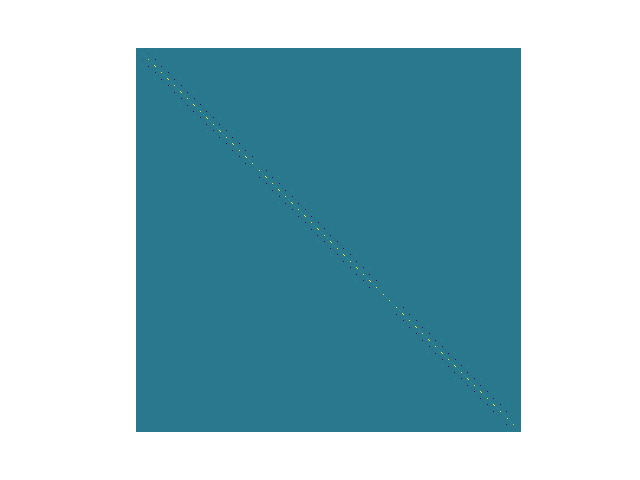

(-0.5, 530.5, 530.5, -0.5)

In [88]:
fig, ax = pyplot.subplots()
ax.imshow(Mreg_t, interpolation="nearest", cmap="viridis")
ax.axis('off')

In [78]:
c1

array([  0.57945119,   5.96382742,   4.73135256,  15.85918099,
         8.87424619,   7.71988287,   0.        ,   0.        ,   0.        ])

In [82]:
Mreg_s = rscha.rscha_spatial_reg_diag((k_even, m_even, n_even), m_mehler, theta_0)
knots = numpy.arange(-1000, 1950, 50)

In [85]:
Mreg_t = rscha.rscha_time_reg_diag(Mreg_s, knots)